In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\Finaldata_Adjusted_Income_Product_Ratio_Dataset_Cleaned.csv')

data = data.drop(columns=['Customer Name'])

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='ISO8601')

# Calculate Customer Lifetime
data['Customer Lifetime'] = (data.groupby('Customer ID')['Purchase Date'].transform('max') - data['Purchase Date']).dt.days

# Calculate Average Purchase Value
data['Average Purchase Value'] = data['Total purchase amount'] / data['Quantity']

# Calculate Purchase Frequency
purchase_frequency = data.groupby('Customer ID').size().reset_index(name='Purchase Frequency')
data = pd.merge(data, purchase_frequency, on='Customer ID', how='left')

# Calculate CLV
data['CLV'] = data['Average Purchase Value'] * data['Purchase Frequency'] * data['Customer Lifetime']

# Display the dataset with Customer Lifetime and CLV
print(data[['Customer ID', 'Customer Lifetime', 'CLV']])

data['Purchase Date'] = data['Purchase Date'].astype('int64') / 10**9

# Display basic information and first few rows of the dataset to assess its structure
data_info = data.info()
data_head = data.head()

data_info, data_head

        Customer ID  Customer Lifetime        CLV
0             46251                 90     4320.0
1             46251                541  1012752.0
2             46251                440   506880.0
3             46251                  0        0.0
4             13593                729  1636605.0
...             ...                ...        ...
249995        33308                  0        0.0
249996        48835                  0        0.0
249997        21019                  0        0.0
249998        49234                  0        0.0
249999        16971                  0        0.0

[250000 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             250000 non-null  int64  
 1   Purchase Date           250000 non-null  float64
 2   Product Category        250000 non-null  

(None,
    Customer ID  Purchase Date  ...  Purchase Frequency        CLV
 0        46251   1.680726e+09  ...                   4     4320.0
 1        46251   1.641709e+09  ...                   4  1012752.0
 2        46251   1.650460e+09  ...                   4   506880.0
 3        46251   1.688522e+09  ...                   4        0.0
 4        13593   1.636926e+09  ...                   5  1636605.0
 
 [5 rows x 17 columns])

In [27]:
inertia_values = []
K = range(1, 11)  # Testing from 1 to 10 clusters

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  inertia_values.append(kmeans.inertia_)

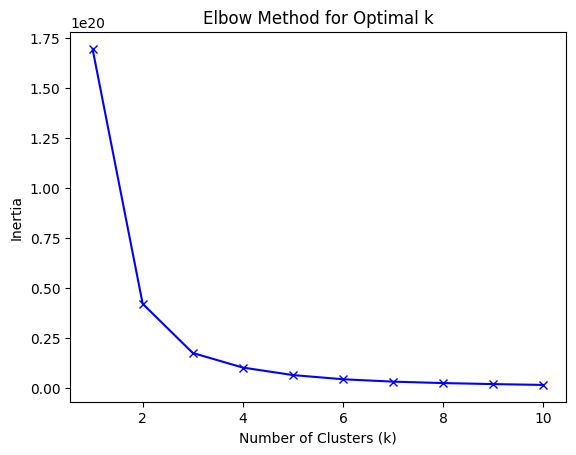

In [28]:
# Plotting the elbow curve
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 3 maybe?

In [3]:
n_clusters = 3
optimal_model = KMeans(n_clusters=n_clusters, max_iter=100, algorithm="lloyd", n_init=100, random_state=42).fit(data)
cluster_labels = optimal_model.predict(data)
labels = optimal_model.labels_

db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

pc_reduced = PCA(n_components=2, random_state=42).fit(data)

reduced_data = pc_reduced.transform(data)

Davies-Bouldin Index: 0.46339687123370643


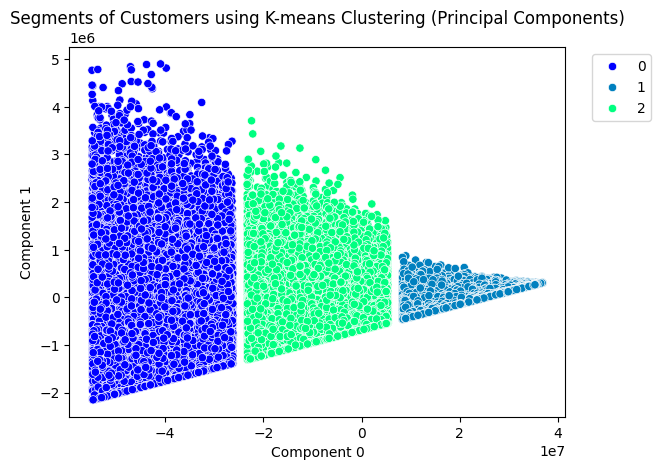

In [6]:
cmap = matplotlib.colormaps["winter"]

ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette=cmap)
ax.set_title("Segments of Customers using K-means Clustering (Principal Components)")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")